## CNN classifier for the MNIST dataset
This example is based on the material from the  coursera course of The Imperial College on london for Tensorflow 2  availabel at https://www.coursera.org/learn/getting-started-with-tensor-flow2


In [ ]:
#### PACKAGE IMPORTS ####

# Run this cell first to import all required packages. Do not make any imports elsewhere in the notebook

import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# If you would like to make further imports from Tensorflow, add them here

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

#### The MNIST dataset

In this assignment, you will use the [MNIST dataset](http://yann.lecun.com/exdb/mnist/). It consists of a training set of 60,000 handwritten digits with corresponding labels, and a test set of 10,000 images. The images have been normalised and centred. The dataset is frequently used in machine learning research, and has become a standard benchmark for image classification models.

- Y. LeCun, L. Bottou, Y. Bengio, and P. Haffner. "Gradient-based learning applied to document recognition." Proceedings of the IEEE, 86(11):2278-2324, November 1998.

Your goal is to construct a neural network that classifies images of handwritten digits into one of 10 classes.

#### Load and preprocess the data

In [ ]:
# Run this cell to load the MNIST data

mnist_data = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist_data.load_data()

11490434/11490434 [==============================] - 0s 0us/step


First, preprocess the data by scaling the training and test images so their values lie in the range from 0 to 1.

In [ ]:
def scale_mnist_data(train_images, test_images):
    """
    This function takes in the training and test images as loaded in the cell above, and scales them
    so that they have minimum and maximum values equal to 0 and 1 respectively.
    Your function should return a tuple (train_images, test_images) of scaled training and test images.
    """
    train_images = train_images/255.
    test_images = test_images/255.
    return (train_images, test_images)


In [ ]:
# Run your function on the input data
scaled_train_images, scaled_test_images = scale_mnist_data(train_images, test_images)

In [ ]:
# Add a dummy channel dimension
scaled_train_images = scaled_train_images[..., np.newaxis]
scaled_test_images = scaled_test_images[..., np.newaxis]

In [ ]:
def get_model_simple(input_shape):
    """
    This is a simple model multilayer perceptron or neural network.
    Your function should return the model.
    """
    model  =  Sequential([
                    Flatten(input_shape=input_shape),
                    Dense(128, activation='relu'),
                    Dense(10, activation='softmax')
    ])
    return model

In [ ]:
def compile_model_simple(model):
    """
    This function takes in the model returned from your get_model function, and compiles it with an optimiser,
    loss function and metric.
    Compile the model using the Adam optimiser (with default settings), the cross-entropy loss function and
    accuracy as the only metric.
    Your function doesn't need to return anything; the model will be compiled in-place.
    """
    model.compile(optimizer= "adam", loss = "sparse_categorical_crossentropy", metrics=['accuracy'])

In [ ]:
def train_model_simple(model, scaled_train_images, train_labels):
    """
    Train the model on the scaled_train_images and train_labels.
    Your function should return the training history, as returned by model.fit.
    """
    history = model.fit(scaled_train_images, train_labels, epochs = 10)
    return history

Run the full network:
* Define architeture of the model (specific layers descriptors)
* Configure the model (set the hyperparameters, optimizers, loss function, and metrcis)
* train the model

In [ ]:
model_nn = get_model_simple(scaled_train_images[0].shape)
model_nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
compile_model_simple(model_nn)

In [ ]:
history_nn = train_model_simple(model_nn, scaled_train_images, train_labels)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0134 - accuracy: 0.9959
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0116 - accuracy: 0.9965
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0099 - accuracy: 0.9970
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0086 - accuracy: 0.9972
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0082 - accuracy: 0.9977
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0074 - accuracy: 0.9977
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0071 - accuracy: 0.9977
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0051 - accuracy: 0.9985
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0070 - accuracy: 0.9979
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.005

# Deep Learning Architecture Convolutional Neural Network (CNN)

#### Build the convolutional neural network model

We are now ready to construct a model to fit to the data. Using the Sequential API, build your CNN model according to the following spec:

* The model should use the `input_shape` in the function argument to set the input size in the first layer.
* A 2D convolutional layer with a 3x3 kernel and 8 filters. Use 'SAME' zero padding and ReLU activation functions. Make sure to provide the `input_shape` keyword argument in this first layer.
* A max pooling layer, with a 2x2 window, and default strides.
* A flatten layer, which unrolls the input into a one-dimensional tensor.
* Two dense hidden layers, each with 64 units and ReLU activation functions.
* A dense output layer with 10 units and the softmax activation function.

In particular, your neural network should have six layers.

In [ ]:
def get_model_deep(input_shape):
    """
    This function should build a Sequential model according to the above specification. Ensure the
    weights are initialised by providing the input_shape argument in the first layer, given by the
    function argument.
    Your function should return the model.
    """
    model  =  Sequential([
                    Conv2D(8, kernel_size=3, padding='same', activation="relu", input_shape=input_shape),
                    MaxPooling2D((2,2)),
                    Flatten(),
                    Dense(64, activation='relu'),
                    Dense(10, activation='softmax')
    ])
    return model


In [ ]:
model = get_model_deep(scaled_train_images[0].shape)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 8)         80        
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 8)         0         
 D)                                                              
                                                                 
 flatten_1 (Flatten)         (None, 1568)              0         
                                                                 
 dense_2 (Dense)             (None, 64)                100416    
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 101146 (395.10 KB)
Trainable params: 101146 (395.10 KB)
Non-trainable params: 0 (0.00 Byte)
______________

#### Compile the model

You should now compile the model using the `compile` method. To do so, you need to specify an optimizer, a loss function and a metric to judge the performance of your model.

In [ ]:
def compile_model_deep(model):
    """
    This function takes in the model returned from your get_model function, and compiles it with an optimiser,
    loss function and metric.
    Compile the model using the Adam optimiser (with default settings), the cross-entropy loss function and
    accuracy as the only metric.
    Your function doesn't need to return anything; the model will be compiled in-place.
    """
    model.compile(optimizer= "adam", loss = "sparse_categorical_crossentropy", metrics=['accuracy'])

In [ ]:
compile_model_deep(model)

#### Fit the model to the training data

Now you should train the model on the MNIST dataset, using the model's `fit` method. Set the training to run for 5 epochs, and return the training history to be used for plotting the learning curves.

In [ ]:
def train_model_deep(model, scaled_train_images, train_labels):
    """
    This function should train the model for 5 epochs on the scaled_train_images and train_labels.
    Your function should return the training history, as returned by model.fit.
    """
    history = model.fit(scaled_train_images, train_labels, epochs = 5)
    return history

In [ ]:
history = train_model_deep(model, scaled_train_images, train_labels)

Epoch 1/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2215 - accuracy: 0.9352
Epoch 2/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0789 - accuracy: 0.9761
Epoch 3/5
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0534 - accuracy: 0.9833
Epoch 4/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0391 - accuracy: 0.9876
Epoch 5/5
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0300 - accuracy: 0.9908


#### Plot the learning curves

We will now plot two graphs:
* Epoch vs accuracy
* Epoch vs loss

We will load the model history into a pandas `DataFrame` and use the `plot` method to output the required graphs.

In [ ]:
# Run this cell to load the model history into a pandas DataFrame

frame = pd.DataFrame(history.history)

[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Accuracy')]

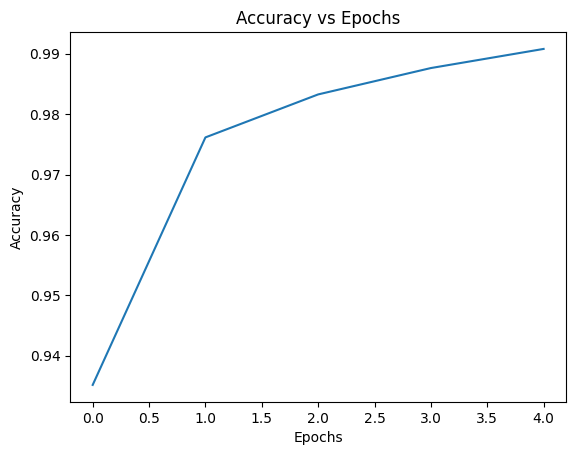

In [ ]:
# Run this cell to make the Accuracy vs Epochs plot

acc_plot = frame.plot(y="accuracy", title="Accuracy vs Epochs", legend=False)
acc_plot.set(xlabel="Epochs", ylabel="Accuracy")

[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Loss')]

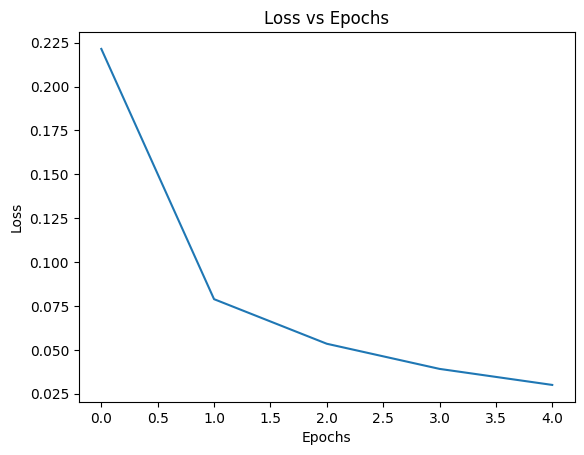

In [ ]:
# Run this cell to make the Loss vs Epochs plot

acc_plot = frame.plot(y="loss", title = "Loss vs Epochs",legend=False)
acc_plot.set(xlabel="Epochs", ylabel="Loss")

#### Evaluate the model

Finally, you should evaluate the performance of your model on the test set, by calling the model's `evaluate` method.

In [ ]:
def evaluate_model(model, scaled_test_images, test_labels):
    """
    This function should evaluate the model on the scaled_test_images and test_labels.
    Your function should return a tuple (test_loss, test_accuracy).
    """
    test_loss, test_accuracy = model.evaluate(scaled_test_images, test_labels)
    return (test_loss, test_accuracy)


In [ ]:
# Run your function to evaluate the model Neural Network Dense Layers

test_loss, test_accuracy = evaluate_model(model_nn, scaled_test_images, test_labels)
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_accuracy}")

313/313 [==============================] - 1s 2ms/step - loss: 0.0854 - accuracy: 0.9779
Test loss: 0.0853574126958847
Test accuracy: 0.9779000282287598


In [ ]:
# Run your function to evaluate the model Convolutional Neural Network

test_loss, test_accuracy = evaluate_model(model, scaled_test_images, test_labels)
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_accuracy}")

313/313 [==============================] - 2s 5ms/step - loss: 0.0464 - accuracy: 0.9846
Test loss: 0.04635732248425484
Test accuracy: 0.9846000075340271


#### Model predictions

Let's see some model predictions! We will randomly select four images from the test data, and display the image and label for each.

For each test image, model's prediction (the label with maximum probability) is shown, together with a plot showing the model's categorical distribution.

1/1 [==============================] - 0s 124ms/step


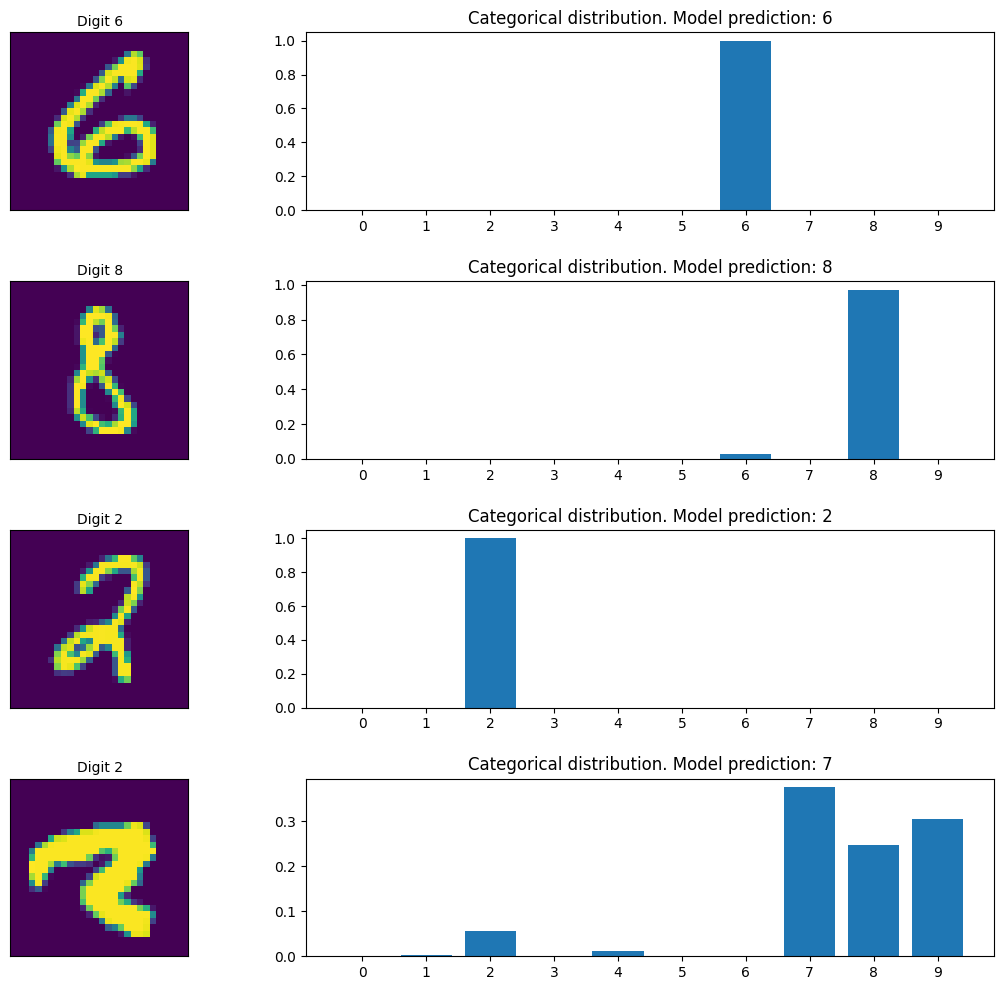

In [ ]:
# Run this cell to get model predictions on randomly selected test images

num_test_images = scaled_test_images.shape[0]

random_inx = np.random.choice(num_test_images, 4)
random_test_images = scaled_test_images[random_inx, ...]
random_test_labels = test_labels[random_inx, ...]

predictions = model.predict(random_test_images)

fig, axes = plt.subplots(4, 2, figsize=(16, 12))
fig.subplots_adjust(hspace=0.4, wspace=-0.2)

for i, (prediction, image, label) in enumerate(zip(predictions, random_test_images, random_test_labels)):
    axes[i, 0].imshow(np.squeeze(image))
    axes[i, 0].get_xaxis().set_visible(False)
    axes[i, 0].get_yaxis().set_visible(False)
    axes[i, 0].text(10., -1.5, f'Digit {label}')
    axes[i, 1].bar(np.arange(len(prediction)), prediction)
    axes[i, 1].set_xticks(np.arange(len(prediction)))
    axes[i, 1].set_title(f"Categorical distribution. Model prediction: {np.argmax(prediction)}")

plt.show()

In [ ]:
prediction

array([3.5602337e-04, 3.0219390e-03, 5.7065818e-02, 4.1377335e-04,
       1.2365694e-02, 8.6246224e-08, 8.5071576e-07, 3.7543955e-01,
       2.4609731e-01, 3.0523902e-01], dtype=float32)